En este archivo Phyton vamos a realizar la carga y tratamiento de los archivos proporcionados por la empresa Pontia World.

# 💻ETL DATOS - EXTRACCION, LIMPIEZA Y CARGA DE JSON💻

#📚Importación de librerias Phyton

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from os import sep
import json
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving emocion.json to emocion.json
Saving id_visitante-atracciones.json to id_visitante-atracciones.json
Saving id_visitante-duracion.json to id_visitante-duracion.json
Saving id_visitante-procedencia.json to id_visitante-procedencia.json
Saving id_visitante-ticket.json to id_visitante-ticket.json
Saving valoraciones.json to valoraciones.json


# 🕵🏻 Exploración de **emocion.json**

In [ ]:
ruta_json = '/content/emocion.json'

# Leer el JSON en un DataFrame
df = pd.read_json(ruta_json, encoding='utf-8')

# Mostrar el DataFrame para verificar
print(df)
df.shape

                 Training_10118481.jpg  Training_10120469.jpg  \
t_id             Training_10118481.jpg  Training_10120469.jpg   
emocion                          angry                  angry   
tiempo_recogida                    291                    425   

                 Training_10131352.jpg  Training_10161559.jpg  \
t_id             Training_10131352.jpg  Training_10161559.jpg   
emocion                          angry                  angry   
tiempo_recogida                    499                    715   

                 Training_1021836.jpg  Training_10269675.jpg  \
t_id             Training_1021836.jpg  Training_10269675.jpg   
emocion                         angry                  angry   
tiempo_recogida                   301                    415   

                 Training_10278738.jpg  Training_10290703.jpg  \
t_id             Training_10278738.jpg  Training_10290703.jpg   
emocion                          angry                  angry   
tiempo_recogida           

(3, 35885)

**Transformar el DataFrame**

Objetivo: Convertir las 35,885 columnas en filas, con columnas separadas para t_id, emocion, y tiempo_recogida.

Acción: Transponer el DataFrame con df.T para que cada fotografía sea una fila, y renombrar las columnas.

In [ ]:
# Transponer para que columnas sean filas
df_emocion = df.T


# Renombrar columnas (opcional, para claridad)
df_emocion.columns = ['t_id', 'emocion', 'tiempo_recogida']

#devolvemos el index

df_emocion = df_emocion.reset_index(drop=True)

# Mostrar el resultado
df_emocion.head()

t_id emocion tiempo_recogida
0  Training_10118481.jpg   angry             291
1  Training_10120469.jpg   angry             425
2  Training_10131352.jpg   angry             499
3  Training_10161559.jpg   angry             715
4   Training_1021836.jpg   angry             301

**Exploración inicial de los datos**

Objetivo:
1.Analizar la distribución de emocion y tiempo_recogida para detectar posibles errores (ej. nulos, valores inválidos).
2.Traducir las emociones a castellado, ya que nuestra empresa es Española

1.   Analizar la distribución de emocion y tiempo_recogida para detectar posibles errores (ej. nulos, valores inválidos).
2.   Traducir las emociones a castellado, ya que nuestra empresa es Española
3.   Entender y trabajar la columnda **tiempo_recogida** para sacar conclusiones y entender coherencia de los datos



In [ ]:
# Exploración inicial

# Exploración

print("Frecuencia de emociones:")
print(df_emocion["emocion"].value_counts())

print("\nEstadísticas de tiempo_recogida:")
print(df_emocion["tiempo_recogida"].describe())

# Diccionario de traducción
traduccion_emociones = {
    'happy': 'feliz',
    'neutral': 'neutral',
    'sad': 'triste',
    'fear': 'miedo',
    'angry': 'enojado',
    'surprise': 'sorpresa',
    'disgust': 'asco'
}
# Cambio de idioma de las emociones
df_emocion['emocion'] = df_emocion['emocion'].replace(traduccion_emociones)
df_emocion.shape



Frecuencia de emociones:
emocion
happy       8901
neutral     6138
sad         6019
fear        5075
angry       4905
surprise    3953
disgust      543
Name: count, dtype: int64

Estadísticas de tiempo_recogida:
count     35885
unique      718
top         150
freq         68
Name: tiempo_recogida, dtype: int64


(35885, 3)

In [ ]:
# Convertir a formato legible
fecha_base = datetime(2022, 9, 1, 7, 0)
df_emocion['fecha_hora'] = df_emocion['tiempo_recogida'].apply(lambda x: fecha_base + timedelta(hours=int(x)))
df_emocion.head(40000)

t_id   emocion tiempo_recogida          fecha_hora
0        Training_10118481.jpg   enojado             291 2022-09-13 10:00:00
1        Training_10120469.jpg   enojado             425 2022-09-19 00:00:00
2        Training_10131352.jpg   enojado             499 2022-09-22 02:00:00
3        Training_10161559.jpg   enojado             715 2022-10-01 02:00:00
4         Training_1021836.jpg   enojado             301 2022-09-13 20:00:00
...                        ...       ...             ...                 ...
35880  PublicTest_98089595.jpg  sorpresa             469 2022-09-20 20:00:00
35881  PublicTest_98567249.jpg  sorpresa             299 2022-09-13 18:00:00
35882  PublicTest_98972870.jpg  sorpresa             255 2022-09-11 22:00:00
35883  PublicTest_99242645.jpg  sorpresa             573 2022-09-25 04:00:00
35884  PublicTest_99446963.jpg  sorpresa             466 2022-09-20 17:00:00

[35885 rows x 4 columns]

In [ ]:
max_tiempo_recogida = df_emocion['tiempo_recogida'].max()

print("=== Valor máximo de tiempo_recogida ===")
print("Máximo:", max_tiempo_recogida)

=== Valor máximo de tiempo_recogida ===
Máximo: 719


In [ ]:
valores_unicos = np.sort(df_emocion['tiempo_recogida'].unique())

print("=== Valores únicos de tiempo_recogida (ordenados de menor a mayor) ===")
print(valores_unicos)
print("\nNúmero de valores únicos:", len(valores_unicos))

=== Valores únicos de tiempo_recogida (ordenados de menor a mayor) ===
[2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 25

In [ ]:
moda_tiempo_recogida = df_emocion['tiempo_recogida'].mode()[0]
print("El valor que más se repite en tiempo_recogida es:", moda_tiempo_recogida)

El valor que más se repite en tiempo_recogida es: 150


In [ ]:
# Horas faltantes en formato legible
horas_faltantes = set(range(717)) - set(df_emocion["tiempo_recogida"])
fechas_faltantes = [fecha_base + timedelta(hours=h) for h in horas_faltantes]
print("Horas faltantes en formato legible:")
for fecha in sorted(fechas_faltantes):
    print(fecha)

Horas faltantes en formato legible:
2022-09-01 07:00:00
2022-09-01 08:00:00


In [ ]:
#creamos nuevas filas en el data frame con los duplicados, en base a la información que tenemos en las fotografías:
nuevas_filas = pd.DataFrame([
    {'t_id': 'Training_8475486_doble.jpg', 'emocion': 'enojado'},
    {'t_id': 'Training_52789098_doble.jpg', 'emocion': 'neutral'}
])

# Añadirlas al DataFrame original
df_emocion = pd.concat([df_emocion, nuevas_filas], ignore_index=True)

#comrpobamos numero de filas
print(df_emocion.shape)

(35887, 4)


In [ ]:
#Rellenamos los nulos con emocion_desconocida para poder hacer una buena evalución posteriormente.
df_emocion['emocion'] = df_emocion['emocion'].fillna('emocion_desconocida')

#Rellenamos los nulos con la moda de la columna tiempo_recogida
df_emocion['fecha_hora'] = df_emocion['fecha_hora'].fillna("2022-09-07 13:00:00")

#Rellenamos los nulos con la moda de la columna tmpo_recogida
df_emocion['tiempo_recogida'] = df_emocion['tiempo_recogida'].fillna(150)

<ipython-input-12-75b42afb5ff3>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_emocion['tiempo_recogida'] = df_emocion['tiempo_recogida'].fillna(150)


In [ ]:
# Inspeccionar nulos después de la imputación
print("\n=== Inspección de nulos después de la imputación ===")
print("Filas totales:", len(df_emocion))
print("Nulos por columna:\n", df_emocion.isnull().sum())
df_emocion.shape



=== Inspección de nulos después de la imputación ===
Filas totales: 35887
Nulos por columna:
 t_id               0
emocion            0
tiempo_recogida    0
fecha_hora         0
dtype: int64


(35887, 4)

In [ ]:
#en vista a los duplicados que hemos visto, vamos a comprobar que emocion tienen asociada. Vemos que efectivamente, coincide con lo que vimos en las
#fotos que tenemos en el data base
print(df_emocion[df_emocion['t_id'].str.contains('8475486')])
print(df_emocion[df_emocion['t_id'].str.contains('52789098')])

                             t_id   emocion  tiempo_recogida  \
3303         Training_8475486.jpg  sorpresa              432   
35885  Training_8475486_doble.jpg   enojado              150   

               fecha_hora  
3303  2022-09-19 07:00:00  
35885 2022-09-07 13:00:00  
                              t_id   emocion  tiempo_recogida  \
18129        Training_52789098.jpg  sorpresa              386   
35886  Training_52789098_doble.jpg   neutral              150   

               fecha_hora  
18129 2022-09-17 09:00:00  
35886 2022-09-07 13:00:00  


In [ ]:
df_emocion.shape

(35887, 4)

#👀 Exploración de valoraciones.json

In [ ]:
# Importo el json "valoraciones" localizado en la carpeta compartida de PROYECTO JÚPITER

import json

ruta_json = '/content/valoraciones.json'

# Abrir y cargar el archivo JSON
with open(ruta_json, 'r', encoding='utf-8') as archivo:
    datos = json.load(archivo)

# Mostrar contenido del JSON - vemos que la clase es un diccionario
print(datos)
print(type(datos))

{'Training_10118481.jpg': 2, 'Training_10120469.jpg': 6, 'Training_10131352.jpg': 0, 'Training_10161559.jpg': 4, 'Training_1021836.jpg': 6, 'Training_10269675.jpg': 3, 'Training_10278738.jpg': 6, 'Training_10290703.jpg': 0, 'Training_10295477.jpg': 1, 'Training_10315441.jpg': 4, 'Training_10316849.jpg': 0, 'Training_10333072.jpg': 7, 'Training_10334355.jpg': 2, 'Training_10345473.jpg': 1, 'Training_10422050.jpg': 5, 'Training_10485618.jpg': 9, 'Training_10503476.jpg': 1, 'Training_10524198.jpg': 3, 'Training_10539399.jpg': 2, 'Training_10592361.jpg': 3, 'Training_10595751.jpg': 8, 'Training_10608067.jpg': 0, 'Training_10740356.jpg': 5, 'Training_10851653.jpg': 3, 'Training_10857340.jpg': 2, 'Training_10882484.jpg': 5, 'Training_10899258.jpg': 2, 'Training_10922970.jpg': 3, 'Training_10967257.jpg': 5, 'Training_11023881.jpg': 1, 'Training_11036720.jpg': 6, 'Training_11102431.jpg': 0, 'Training_11175213.jpg': 10, 'Training_11185740.jpg': 1, 'Training_1119091.jpg': 8, 'Training_11206889.j

In [ ]:
datos_valoraciones = [] #creamos una lista vacia para almacenar los datos

for archivo, valoracion in datos.items(): #queremos que en el bucle for para cada archivo nos guarde el diccionario en la variable valoracion
    datos_valoraciones.append({
        't_id': archivo,
        'valoracion': valoracion
    })

# Verificar resultado
print(datos_valoraciones[:5])  # Muestra las primeras 5 entradas

df_valoraciones = pd.DataFrame(datos_valoraciones)

print(df_valoraciones.shape)
print(df_valoraciones.describe())
df_valoraciones.columns
df_valoraciones.head()

[{'t_id': 'Training_10118481.jpg', 'valoracion': 2}, {'t_id': 'Training_10120469.jpg', 'valoracion': 6}, {'t_id': 'Training_10131352.jpg', 'valoracion': 0}, {'t_id': 'Training_10161559.jpg', 'valoracion': 4}, {'t_id': 'Training_1021836.jpg', 'valoracion': 6}]
(35885, 2)
         valoracion
count  35885.000000
mean       4.983921
std        3.153761
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       10.000000


t_id  valoracion
0  Training_10118481.jpg           2
1  Training_10120469.jpg           6
2  Training_10131352.jpg           0
3  Training_10161559.jpg           4
4   Training_1021836.jpg           6

In [ ]:
#Comprobamos que no hay nulos
df_valoraciones.isnull().sum()

t_id          0
valoracion    0
dtype: int64

In [ ]:
#observamos que la valoración es un object pero vemos que es un entero, asi que cambiamos el tipo de dato
#y lo pasamos a entero, comprobando depues
df_valoraciones['valoracion'] = df_valoraciones['valoracion'].astype(int)
df_valoraciones.dtypes
print(df_valoraciones.shape)

(35885, 2)


In [ ]:
#creamos nuevas filas en el data frame con los duplicados. De momento no añadiremos
#la info de la valoración ya que lo haremos en base a la media de la emoción en el merge de ambos df
nuevas_filas = pd.DataFrame([
    {'t_id': 'Training_8475486_doble.jpg'},
    {'t_id': 'Training_52789098_doble.jpg'}
])

# Añadirlas al DataFrame original
df_valoraciones = pd.concat([df_valoraciones, nuevas_filas], ignore_index=True)

#comrpobamos numero de filas
print(df_valoraciones.shape)

(35887, 2)


In [ ]:
print(df_valoraciones[df_valoraciones['t_id'].str.contains('8475486')])
print(df_valoraciones[df_valoraciones['t_id'].str.contains('52789098')])

                             t_id  valoracion
3303         Training_8475486.jpg         9.0
35885  Training_8475486_doble.jpg         NaN
                              t_id  valoracion
18129        Training_52789098.jpg         5.0
35886  Training_52789098_doble.jpg         NaN


# MERGE DE EMOCION Y VALORACIONES

In [ ]:
emocion_valoraciones = pd.merge(df_emocion, df_valoraciones, on='t_id', how='inner') #how='inner':
# solo conservará las filas que tienen el mismo t_id en ambos

#comprobamos numero de filas y head
print(emocion_valoraciones.shape)
emocion_valoraciones.head()

(35887, 5)


t_id  emocion  tiempo_recogida          fecha_hora  \
0  Training_10118481.jpg  enojado              291 2022-09-13 10:00:00   
1  Training_10120469.jpg  enojado              425 2022-09-19 00:00:00   
2  Training_10131352.jpg  enojado              499 2022-09-22 02:00:00   
3  Training_10161559.jpg  enojado              715 2022-10-01 02:00:00   
4   Training_1021836.jpg  enojado              301 2022-09-13 20:00:00   

   valoracion  
0         2.0  
1         6.0  
2         0.0  
3         4.0  
4         6.0

In [ ]:
#calculamos la valoracion media de la emocion ¨enojado¨ y ¨neutral¨
media_enojado = emocion_valoraciones[emocion_valoraciones['emocion'] == 'enojado']['valoracion'].mean()
print(f"Valoración media para 'enojado': {media_enojado}")

media_neutral = emocion_valoraciones[emocion_valoraciones['emocion'] == 'neutral']['valoracion'].mean()
print(f"Valoración media para 'neutral': {media_neutral}")

Valoración media para 'enojado': 4.971049949031601
Valoración media para 'neutral': 4.930922124470512


In [ ]:
emocion_valoraciones.tail()

t_id   emocion  tiempo_recogida  \
35882      PublicTest_98972870.jpg  sorpresa              255   
35883      PublicTest_99242645.jpg  sorpresa              573   
35884      PublicTest_99446963.jpg  sorpresa              466   
35885   Training_8475486_doble.jpg   enojado              150   
35886  Training_52789098_doble.jpg   neutral              150   

               fecha_hora  valoracion  
35882 2022-09-11 22:00:00        10.0  
35883 2022-09-25 04:00:00         5.0  
35884 2022-09-20 17:00:00         0.0  
35885 2022-09-07 13:00:00         NaN  
35886 2022-09-07 13:00:00         NaN

In [ ]:
#Insertamos la media de las emociones (5 en este caso) para los campos que tenemos nulos:
emocion_valoraciones['valoracion'] = emocion_valoraciones['valoracion'].fillna(5)

In [ ]:
emocion_valoraciones.tail()

t_id   emocion  tiempo_recogida  \
35882      PublicTest_98972870.jpg  sorpresa              255   
35883      PublicTest_99242645.jpg  sorpresa              573   
35884      PublicTest_99446963.jpg  sorpresa              466   
35885   Training_8475486_doble.jpg   enojado              150   
35886  Training_52789098_doble.jpg   neutral              150   

               fecha_hora  valoracion  
35882 2022-09-11 22:00:00        10.0  
35883 2022-09-25 04:00:00         5.0  
35884 2022-09-20 17:00:00         0.0  
35885 2022-09-07 13:00:00         5.0  
35886 2022-09-07 13:00:00         5.0

In [ ]:
#Convertimos la valoración a integer:
emocion_valoraciones['valoracion'] = emocion_valoraciones['valoracion'].astype(int)
emocion_valoraciones.head(2)

t_id  emocion  tiempo_recogida          fecha_hora  \
0  Training_10118481.jpg  enojado              291 2022-09-13 10:00:00   
1  Training_10120469.jpg  enojado              425 2022-09-19 00:00:00   

   valoracion  
0           2  
1           6

In [ ]:
emocion_valoraciones.isnull().sum()

t_id               0
emocion            0
tiempo_recogida    0
fecha_hora         0
valoracion         0
dtype: int64

In [ ]:
emocion_valoraciones.to_csv('emocion_valoraciones.csv', index=False)

#🌏 Exploración de id_visitante_procedencia.json

In [ ]:
path_to_file = "/content/id_visitante-procedencia.json"

# leer archivo json
with open(path_to_file, 'r') as file:
    procedencia= json.load(file)
print(procedencia)

{'3': [{'t_id': 'Training_10118481.jpg', 'procedencia': 'Filipinas'}, {'t_id': 'Training_15361067.jpg', 'procedencia': 'España'}, {'t_id': 'Training_16232328.jpg', 'procedencia': 'Puerto Rico'}, {'t_id': 'Training_27705571.jpg', 'procedencia': 'Paraguay'}, {'t_id': 'Training_63766171.jpg', 'procedencia': 'Argentina'}, {'t_id': 'Training_66555113.jpg', 'procedencia': 'España'}, {'t_id': 'Training_81499267.jpg', 'procedencia': 'República Dominicana'}, {'t_id': 'Training_94007493.jpg', 'procedencia': 'Jamaica'}, {'t_id': 'Training_12950225.jpg', 'procedencia': 'España'}, {'t_id': 'Training_42955258.jpg', 'procedencia': 'España'}, {'t_id': 'Training_50338135.jpg', 'procedencia': 'Ecuador'}, {'t_id': 'Training_65820611.jpg', 'procedencia': 'Haití'}, {'t_id': 'Training_8397060.jpg', 'procedencia': 'Chile'}, {'t_id': 'Training_90069123.jpg', 'procedencia': 'España'}, {'t_id': 'Training_28136915.jpg', 'procedencia': 'España'}, {'t_id': 'Training_52516519.jpg', 'procedencia': 'Filipinas'}, {'t_

In [ ]:
#creamos una lista vacia para almacenar los datos
datos_procedencia = []

for id_visitante, lista_id in procedencia.items():
    for elemento in lista_id:  # cada elemento es un diccionario individual
        elemento["id_visitante"] = int(id_visitante)
        datos_procedencia.append(elemento)

df_procedencia = pd.DataFrame(datos_procedencia)

df_procedencia.dtypes
df_procedencia.describe()
df_procedencia[df_procedencia.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados de la columna t_id




t_id procedencia  id_visitante
2484    Training_8475486.jpg      España            74
15577  Training_52789098.jpg      España           469
16312   Training_8475486.jpg      España           495
21163  Training_52789098.jpg       India           675

In [ ]:
#en base a lo que hemos hecho en emociones que es añadir las filas de fotos que faltaban, renombramos las fotos duplicadas con el sufijo_doble
#para poder mantener los registros

# Detectar duplicados completos (ambos)
duplicado = df_procedencia.duplicated('t_id', keep=False)

# Identificar primera ocurrencia de cada duplicado en el DataFrame completo
primera_ocurrencia = df_procedencia.duplicated('t_id', keep='last')

# Aplicar cambio solo a esas primeras ocurrencias
df_procedencia.loc[primera_ocurrencia, 't_id'] = (
    df_procedencia.loc[primera_ocurrencia, 't_id']
    .str.replace('.jpg', '_doble.jpg', regex=False)
)

#comrpobar que lo hemos hecho bien
print(df_procedencia[df_procedencia['t_id'].str.contains('8475486')])

                             t_id procedencia  id_visitante
2484   Training_8475486_doble.jpg      España            74
16312        Training_8475486.jpg      España           495


In [ ]:
df_procedencia.head() #podemos observar que un unico id_visitante tiene varias procedencia, analizaremos mas porque no parece correcto

t_id  procedencia  id_visitante
0  Training_10118481.jpg    Filipinas             3
1  Training_15361067.jpg       España             3
2  Training_16232328.jpg  Puerto Rico             3
3  Training_27705571.jpg     Paraguay             3
4  Training_63766171.jpg    Argentina             3

Consideramos que el id_visitante es erróneo, por lo que no vamos a modificar el df en base a esta columna, sino que nos centraremos en el t_id.

En EDA exploraremos igualmente sobre las procedencias por visitante, pero para la exportación, lo dejaremos así.

#🧭Exploración de id_visitante_duracion.json

In [ ]:
# Como el json es complejo lo vamos a leer tal cual es, como un diccionario

#leer json de manera estandard - hemos encontrado ese trozo de codigo en bibliografia

with open("/content/id_visitante-duracion.json", "r", encoding="utf-8") as file:
    datos = json.load(file)

# Ver estructura y efectivamente es un diccionario
print(type(datos))

#creamos una lista vacia para almacenar los datos
datos_duracion =[]

#a las primeras claves, los numeros que contienen las listas dentro , la llamaremos ¨id_visitante¨
#porque es el numero que corresponde a cada visitante
#hacemos un doble for (for dentro de for) - primero recorremos las claves numericas y luego las listas dento de cada clave
for id_visitante , lista in datos.items(): #recorremos cada diccionario con clave numerica : primera vuelta 3, segunda 4 etc
  for elemento_listas in lista: #recorremos cada diccionario dentro de esa lista
     elemento_listas["id_visitante"] = int(id_visitante)
     datos_duracion.append(elemento_listas)

df_duracion=pd.DataFrame(datos_duracion)
df_duracion.head(20)

print(df_duracion.shape)
df_duracion.describe()


<class 'dict'>
(35887, 3)


duracion  id_visitante
count  35887.000000  35887.000000
mean     359.748934    625.675760
std      100.122517    433.719407
min      -39.000000      1.000000
25%      292.000000    260.000000
50%      359.000000    553.000000
75%      428.000000    937.000000
max      811.000000   1787.000000

In [ ]:
#convertimos duracion a int
df_duracion["duracion"] = df_duracion["duracion"].astype(int)
df_duracion["duracion"].describe()
df_duracion[df_duracion.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados de la columna t_id

t_id  duracion  id_visitante
2484    Training_8475486.jpg       346            74
15577  Training_52789098.jpg       336           469
16312   Training_8475486.jpg       507           495
21163  Training_52789098.jpg       160           675

In [ ]:
#en base a lo que hemos hecho en emociones que es añadir las filas de fotos que faltaban, renombramos las fotos duplicadas con el sufijo_doble
#para poder mantener los registros

# Detectar duplicados completos (ambos)
duplicado = df_duracion.duplicated('t_id', keep=False)

# Identificar primera ocurrencia de cada duplicado en el DataFrame completo
primera_ocurrencia = df_duracion.duplicated('t_id', keep='last')

# Aplicar cambio solo a esas primeras ocurrencias
df_duracion.loc[primera_ocurrencia, 't_id'] = (
    df_duracion.loc[primera_ocurrencia, 't_id']
    .str.replace('.jpg', '_doble.jpg', regex=False)
)

#comrpobar que lo hemos hecho bien
print(df_duracion[df_duracion['t_id'].str.contains('8475486')])
print(df_duracion[df_duracion['t_id'].str.contains('52789098')])

                             t_id  duracion  id_visitante
2484   Training_8475486_doble.jpg       346            74
16312        Training_8475486.jpg       507           495
                              t_id  duracion  id_visitante
15577  Training_52789098_doble.jpg       336           469
21163        Training_52789098.jpg       160           675


In [ ]:
#Vamos a crear un df con los valores negativos y mayores de 540 min para el posterior EDA.
df_duracion_eda = df_duracion
df_mayor9horas = df_duracion[df_duracion['duracion'] > 540] #creamos un DF con los outliers

In [ ]:
#Calculamos la media de duracion en el df_duracion
media_duracion = df_duracion['duracion'].mean()
print(f"La media de la duración es {media_duracion.round(0)}")

La media de la duración es 360.0


Observamos de lo anterior que con la variable duracion nos ocurre algo parecido que con procedencia. Procedemos entonces a aplicar el mismo tratamiento, pero en vez de hacer la moda, creemos conveniente elegir la media de duraciones, comprobando primero que ninguna duracion supera las 9 horas

In [ ]:
#comprobamos valores negativos en duracion (tiempo no puede ser negativo)
df_negativos = df_duracion[df_duracion['duracion'] < 0 & df_duracion['id_visitante']]
df_negativos

t_id  duracion  id_visitante
493  Training_10422050.jpg       -39            17

In [ ]:
#Como solo es un valor negativo, y no sabemos muy bien por qué, optamos por sustituirlo por la media
#para que no afecte menos posible:

# Imputar la media en valores negativos de la columna coste
df_duracion.loc[df_duracion['duracion'] < 0, 'duracion'] = media_duracion
print(df_duracion['duracion'].describe())  # Resumen estadístico

count    35887.000000
mean       359.760045
std        100.100388
min          1.000000
25%        292.000000
50%        359.000000
75%        428.000000
max        811.000000
Name: duracion, dtype: float64


<ipython-input-40-4eef8a268d17>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '359.7489341544292' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_duracion.loc[df_duracion['duracion'] < 0, 'duracion'] = media_duracion


In [ ]:
#comprobamos de nuevo que no hay valores negativos en duracion:
df_duracion[df_duracion['duracion'] < 0 & df_duracion['id_visitante']]

Empty DataFrame
Columns: [t_id, duracion, id_visitante]
Index: []

In [ ]:
#comprobamos una de las reglas de negocio - vamos a ver que la duracion no sea mayor a 9 horas
df_duracion['duracion_excesiva'] = df_duracion['duracion'] > 540

# True si un visitante ha estado más de 540 minutos (9h)
duracion_larga = df_duracion['duracion_excesiva'].sum()
print(f"Hay {duracion_larga} registros con duración superior a 9 horas, que supone el {(duracion_larga*100)/35887:.2f}% del total de registros")
df_duracion = df_duracion.drop('duracion_excesiva', axis=1) #no necesitamos la columna booleana que se ha creado asi que la quitamos

Hay 1279 registros con duración superior a 9 horas, que supone el 3.56% del total de registros


In [ ]:
# vamos a ver una descripcion estadística de esos valores > 9 h
df_duracion[df_duracion['duracion'] >540].describe()

duracion  id_visitante
count  1279.000000   1279.000000
mean    580.591087    626.935106
std      36.306976    434.492624
min     541.000000      1.000000
25%     553.000000    249.500000
50%     570.000000    559.000000
75%     598.000000    941.500000
max     811.000000   1771.000000

En promedio, estas visitas duran casi 10 horas. Hay baja dispersión, así que son visitas largas pero consistentes. Estas no son registros con duraciones extremadamente erráticas, por lo que podemos considerarlo un error.

Añadimos en todos los valores superiores a 9h, la duración máxima (9h). Entendemos que no deben haber valores superiores, ya que son errores.

In [ ]:
# Imputar 9h (540 min) en valores que tengan una cantidad superior
df_duracion.loc[df_duracion['duracion'] > 540, 'duracion'] = 540
print(df_duracion['duracion'].describe())  # Resumen estadístico

count    35887.000000
mean       358.313393
std         96.906263
min          1.000000
25%        292.000000
50%        359.000000
75%        428.000000
max        540.000000
Name: duracion, dtype: float64


In [ ]:
#Comprobamos que no hay valores superiores a nueve horas
registros = (df_duracion['duracion'] > 540).sum()
print(f"Hay {registros} registros con duración superior a 9 horas")

Hay 0 registros con duración superior a 9 horas


In [ ]:
#Vamos a ver si los visitantes tienen más de una duración.

#Guardamos los valores únicos de duración
visitante_duraciones = df_duracion.groupby('id_visitante')['duracion'].nunique()

# Ver cuántos visitantes tienen más de una duración
multiples_duraciones = visitante_duraciones[visitante_duraciones > 1]

# Mostrar resumen
print("Numero de visitantes unicos:", visitante_duraciones.shape[0])
print("ATENTO: Visitantes con múltiples duraciones:", multiples_duraciones.shape[0])

Numero de visitantes unicos: 1787
ATENTO: Visitantes con múltiples duraciones: 1748


Vamos a comprobar que la suma de las duraciones de un mismo visitante es mayor a 30 días, porque en ese caso podemos considerarlo un error.

In [ ]:
#Me quedo solo con los visitantes que tienen más de una duración y hago la suma de minutos de cada uno:
duraciones = multiples_duraciones.reset_index().groupby('id_visitante')['duracion'].sum().reset_index()

#Compruebo si alguno supera el mes:
mes_min =540*30

duraciones_filtro = duraciones[(duraciones["duracion"] > mes_min)]
duraciones_filtro

Empty DataFrame
Columns: [id_visitante, duracion]
Index: []

Vemos que no hay ningún registro que supere los días del mes, así que consideramos que son visitantes que han ido más de un día al parque.

In [ ]:
df_duracion.head(2)

t_id  duracion  id_visitante
0  Training_10118481.jpg     308.0             3
1  Training_15361067.jpg     344.0             3

In [ ]:
df_duracion['duracion'] =df_duracion['duracion'].astype(int)
df_duracion.head(2)

t_id  duracion  id_visitante
0  Training_10118481.jpg       308             3
1  Training_15361067.jpg       344             3

In [ ]:
df_duracion.shape

(35887, 3)

#🎢Exploración de id_visitante_atracciones.json

In [ ]:
#Como no puedo abrirlo con pandas,leer json de manera estandard.
with open('/content/id_visitante-atracciones.json', 'r', encoding="utf-8") as file:
    data = json.load(file)
#Confirmamos que lo que tenemos es un diccionario
type(data)

dict

In [ ]:
#Para convertirlo en dataframe, vamos a hacer un bucle. Hacemos un primer bucle para las claves, y luego un segundo para las listas dentro del valor del diccionario.
datos_atracciones = []

for id_visitante , lista in data.items():
  for elemento_listas in lista:
     elemento_listas["id_visitante"] = int(id_visitante)
     datos_atracciones.append(elemento_listas)
df_atracciones=pd.DataFrame(datos_atracciones)


#Vamos a cambiar la columna 'comienzo atraccion' por enteros

# Rellenar con un valor por defecto, por ejemplo 0
df_atracciones['comienzo_atraccion'] = df_atracciones['comienzo_atraccion'].astype('Int64')


#Vamos a convertir el 'comienzo_atraccion' en un formato legible.
#Ponemos como fecha base el 1 de septiembre de 2022 a las 7:00h.

#pd.notnull(x) → verifica que el valor no sea NaN

#pd.NaT → es el equivalente nulo para fechas en Pandas


fecha_base = datetime(2022, 9, 1, 7, 0)

df_atracciones['comienzo_atraccion_fecha_hora'] = df_atracciones['comienzo_atraccion'].apply(
    lambda x: fecha_base + timedelta(hours=int(x)) if pd.notnull(x) else pd.NaT
)

df_atracciones.describe()
df_atracciones[df_atracciones.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados

#como vemos, coinciden con los del archivo de duraciones (IMPORTANTE)



t_id                   atraccion  comienzo_atraccion  \
2484    Training_8475486.jpg      Carrera de Autos Locos                 529   
15577  Training_52789098.jpg         Aventuras Acuáticas                 478   
16312   Training_8475486.jpg             Araña Saltarina                 432   
21163  Training_52789098.jpg  Carros Chocones Divertidos                 386   

       tiempo_de_espera  id_visitante comienzo_atraccion_fecha_hora  
2484                 11            74           2022-09-23 08:00:00  
15577                16           469           2022-09-21 05:00:00  
16312                 7           495           2022-09-19 07:00:00  
21163                12           675           2022-09-17 09:00:00

In [ ]:
#en base a lo que hemos hecho en emociones que es añadir las filas de fotos que faltaban, renombramos las fotos duplicadas con el sufijo_doble
#para poder mantener los registros

# Detectar duplicados completos (ambos)
duplicado = df_atracciones.duplicated('t_id', keep=False)

# Identificar primeras ocurrencia de cada duplicado en el DataFrame completo
primera_ocurrencia = df_atracciones.duplicated('t_id', keep='last')

# Aplicar cambio solo a esas segundas ocurrencias
df_atracciones.loc[primera_ocurrencia, 't_id'] = (
    df_atracciones.loc[primera_ocurrencia, 't_id']
    .str.replace('.jpg', '_doble.jpg', regex=False)
)

#comrpobar que lo hemos hecho bien
print(df_atracciones[df_atracciones['t_id'].str.contains('8475486')])
print(df_atracciones[df_atracciones['t_id'].str.contains('52789098')])

                             t_id               atraccion  comienzo_atraccion  \
2484   Training_8475486_doble.jpg  Carrera de Autos Locos                 529   
16312        Training_8475486.jpg         Araña Saltarina                 432   

       tiempo_de_espera  id_visitante comienzo_atraccion_fecha_hora  
2484                 11            74           2022-09-23 08:00:00  
16312                 7           495           2022-09-19 07:00:00  
                              t_id                   atraccion  \
15577  Training_52789098_doble.jpg         Aventuras Acuáticas   
21163        Training_52789098.jpg  Carros Chocones Divertidos   

       comienzo_atraccion  tiempo_de_espera  id_visitante  \
15577                 478                16           469   
21163                 386                12           675   

      comienzo_atraccion_fecha_hora  
15577           2022-09-21 05:00:00  
21163           2022-09-17 09:00:00  


In [ ]:
df_atracciones.shape

(35887, 6)

In [ ]:
#Vamos a calcular la moda del df_atraccion sin filtrar
moda_comienzo_atraccion = df_atracciones['comienzo_atraccion'].mode()[0]
print(f"La moda del comienzo de atraccion: {moda_comienzo_atraccion:.2f}")
moda_tiempo_espera = df_atracciones['tiempo_de_espera'].mode()[0]
print(f"La moda del tiempo de espera es: {moda_comienzo_atraccion:.2f}")

La moda del comienzo de atraccion: -1.00
La moda del tiempo de espera es: -1.00


In [ ]:
#Hacemos la moda de todos los valores menos los negativos
df_atracciones_2 = df_atracciones[df_atracciones['comienzo_atraccion'] >= 0]
moda_comienzo_atraccion = df_atracciones_2['comienzo_atraccion'].mode()[0]
print(f"La moda del tiempo de espera es sin contar los valores negativos es: {moda_comienzo_atraccion:.2f}")

La moda del tiempo de espera es sin contar los valores negativos es: 150.00


In [ ]:
df_atracciones.head(40000)

t_id                atraccion  comienzo_atraccion  \
0        Training_10118481.jpg  Montaña Rusa de la Luna                 291   
1        Training_15361067.jpg        Mansión Embrujada                 180   
2        Training_16232328.jpg    Simulador Espacial 3D                 384   
3        Training_27705571.jpg     Fiesta de los Dulces                 625   
4        Training_63766171.jpg         Gran Caída Libre                 613   
...                        ...                      ...                 ...   
35882   PublicTest_2529039.jpg    Espejos de la Risueña                 421   
35883  PublicTest_27916929.jpg        Rápido del Trueno                 185   
35884  PublicTest_64107181.jpg       Carrusel Encantado                 106   
35885  PublicTest_81098275.jpg        Mansión Embrujada                 679   
35886  PublicTest_94828377.jpg                     None                 417   

       tiempo_de_espera  id_visitante comienzo_atraccion_fecha_hora  
0                     5             3           2022-09-13 10:00:00  
1                    11             3           2022-09-08 19:00:00  
2                    19             3           2022-09-17 07:00:00  
3                     9             3           2022-09-27 08:00:00  
4                    17             3           2022-09-26 20:00:00  
...                 ...           ...                           ...  
35882                18          1783           2022-09-18 20:00:00  
35883                18          1784           2022-09-09 00:00:00  
35884                16          1785           2022-09-05 17:00:00  
35885                16          1786           2022-09-29 14:00:00  
35886                13          1787           2022-09-18 16:00:00  

[35887 rows x 6 columns]

In [ ]:
# Buscamos la cantidad de nulos dentro de nuestro DF
print("\nNulos por columna:\n", df_atracciones.isnull().sum())
# podemos observar que en la columna "atracción " hay 1132 nulos en una columna que es importante para el desarrollo de nuestro análisis


Nulos por columna:
 t_id                                0
atraccion                        1138
comienzo_atraccion                 96
tiempo_de_espera                    0
id_visitante                        0
comienzo_atraccion_fecha_hora      96
dtype: int64


In [ ]:
df_atracciones['comienzo_atraccion'].unique()

<IntegerArray>
[291, 180, 384, 625, 613, 533, 297,  82, 316, 552,
 ...
 468,   7, 153, 532, 708, 663, 149, 501, 198, 407]
Length: 720, dtype: Int64

In [ ]:
#Imputaremos los datos nulos de la columna atracciones a atracciones desconocidas
df_atracciones['atraccion'] = df_atracciones['atraccion'].fillna('atraccion_desconocida')

#Imputaremos los datos nulos de comienzo de atracción a 150 ya que es la moda
df_atracciones['comienzo_atraccion'] = df_atracciones['comienzo_atraccion'].fillna(150)

#Imputaremos a 150 los datos negativos de dentro de la ambas columnas (comienzo_atraccion y comienzo_atraccion_fecha_hora) de tiempo ya que carecen de sentido porque al indicar
#en la columna "comienzo atraccion" el valor -1 sugiere un dato fuera del rango de 0 a 719 de nros enteros correspondientes
#a las horas, tomando en cuenta que el guíon dice específicamente que la hora de comienzo es 07:00 del 1 de septiembre de 2022 (hora 0 en nros enteros)
df_atracciones['comienzo_atraccion_fecha_hora'] = df_atracciones['comienzo_atraccion_fecha_hora'].fillna('2022-09-07 13:00:00')
df_atracciones.isnull().sum()

t_id                             0
atraccion                        0
comienzo_atraccion               0
tiempo_de_espera                 0
id_visitante                     0
comienzo_atraccion_fecha_hora    0
dtype: int64

In [ ]:
print(df_atracciones['tiempo_de_espera'].describe())  # Resumen estadístico

count    35887.000000
mean        12.498036
std          4.014144
min         -3.000000
25%         10.000000
50%         12.000000
75%         15.000000
max         28.000000
Name: tiempo_de_espera, dtype: float64


In [ ]:
#Comprobamos que no haya negativos en las columnas numéricas
negativos = df_atracciones[(df_atracciones['comienzo_atraccion']<0) | (df_atracciones['tiempo_de_espera']<0) | (df_atracciones['id_visitante']<0)]
negativos.shape

In [ ]:
#Como vemos que son muchas, vamos a ver por columna
negativos_comienzo = df_atracciones[(df_atracciones['comienzo_atraccion']<0)]
negativos_comienzo

In [ ]:
negativos_espera = df_atracciones[(df_atracciones['tiempo_de_espera']<0)]
negativos_espera

In [ ]:
negativos_visitante = df_atracciones[(df_atracciones['id_visitante']<0)]
negativos_visitante

#🎫Exploración de id_visitante_ticket.json

In [ ]:
#Como no puedo abrirlo con pandas, abro el archivo de esta forma para poder verlo.
#Confirmamos que lo que tenemos es un diccionario

with open('/content/id_visitante-ticket.json', 'r', encoding="utf-8") as file:
    data = json.load(file)

type(data)

dict

In [ ]:
#Para convertirlo en dataframe, vamos a hacer un bucle. Hacemos un primer bucle para las claves, y luego un segundo para las listas dentro del valor del diccionario.

datos = []

for id, tablas in data.items():
  for tabla in tablas:
    tabla['id'] = int(id)
    datos.append (tabla)


In [ ]:
#Lo convertimos en df
df_ticket = pd.DataFrame(datos)
df_ticket.info()
#Renombramos la columna para que coincida con los datos.
df_ticket.rename(columns = {'id':'id_visitante'}, inplace=True)
df_ticket.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   t_id                  35887 non-null  object 
 1   tipo_entrada          35887 non-null  object 
 2   coste                 35887 non-null  float64
 3   antelacion_de_compra  35887 non-null  int64  
 4   id                    35887 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ MB


t_id      tipo_entrada      coste  antelacion_de_compra  \
0  Training_10118481.jpg        Pase Anual  14.003708                     0   
1  Training_15361067.jpg  Entrada Familiar  20.900902                     2   
2  Training_16232328.jpg  Entrada Infantil  12.638039                   218   
3  Training_27705571.jpg       Paquete VIP  18.491775                    39   
4  Training_63766171.jpg  Entrada Familiar  18.233458                   135   

   id_visitante  
0             3  
1             3  
2             3  
3             3  
4             3

In [ ]:
#redondeamos el coste a 2 decimales
df_ticket['coste'] = df_ticket['coste'].apply(lambda x: round(x, 2))
df_ticket.head()

t_id      tipo_entrada  coste  antelacion_de_compra  \
0  Training_10118481.jpg        Pase Anual  14.00                     0   
1  Training_15361067.jpg  Entrada Familiar  20.90                     2   
2  Training_16232328.jpg  Entrada Infantil  12.64                   218   
3  Training_27705571.jpg       Paquete VIP  18.49                    39   
4  Training_63766171.jpg  Entrada Familiar  18.23                   135   

   id_visitante  
0             3  
1             3  
2             3  
3             3  
4             3

In [ ]:
df_ticket[df_ticket.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados

#como vemos, coinciden con los del archivo de duraciones, atracciones, procedencia (IMPORTANTE)

t_id        tipo_entrada  coste  antelacion_de_compra  \
2484    Training_8475486.jpg          Pase Anual  14.16                   230   
15577  Training_52789098.jpg    Entrada Infantil  14.76                    13   
16312   Training_8475486.jpg  Entrada Individual  18.74                     0   
21163  Training_52789098.jpg         Paquete VIP  21.15                     0   

       id_visitante  
2484             74  
15577           469  
16312           495  
21163           675

In [ ]:
#en base a lo que hemos hecho en emociones que es añadir las filas de fotos que faltaban, renombramos las fotos duplicadas con el sufijo_doble
#para poder mantener los registros. Lo hacemos para la primera ocurrencia, ya que hemos visto que una fe las fotos que no aparecen corresponde a un bebe
#entonces, corresponderia a una entrada infantil

# Detectar duplicados completos (ambos)
duplicado = df_ticket.duplicated('t_id', keep=False)

# Identificar primera ocurrencia de cada duplicado en el DataFrame completo
primera_ocurrencia = df_ticket.duplicated('t_id', keep='last')

# Aplicar cambio solo a esass primera ocurrencias
df_ticket.loc[primera_ocurrencia, 't_id'] = (
    df_ticket.loc[primera_ocurrencia, 't_id']
    .str.replace('.jpg', '_doble.jpg', regex=False)
)

#comrpobar que lo hemos hecho bien
print(df_ticket[df_ticket['t_id'].str.contains('8475486')])
print(df_ticket[df_ticket['t_id'].str.contains('52789098')])
df_ticket.head(40000)

                             t_id        tipo_entrada  coste  \
2484   Training_8475486_doble.jpg          Pase Anual  14.16   
16312        Training_8475486.jpg  Entrada Individual  18.74   

       antelacion_de_compra  id_visitante  
2484                    230            74  
16312                     0           495  
                              t_id      tipo_entrada  coste  \
15577  Training_52789098_doble.jpg  Entrada Infantil  14.76   
21163        Training_52789098.jpg       Paquete VIP  21.15   

       antelacion_de_compra  id_visitante  
15577                    13           469  
21163                     0           675  


t_id        tipo_entrada  coste  \
0        Training_10118481.jpg          Pase Anual  14.00   
1        Training_15361067.jpg    Entrada Familiar  20.90   
2        Training_16232328.jpg    Entrada Infantil  12.64   
3        Training_27705571.jpg         Paquete VIP  18.49   
4        Training_63766171.jpg    Entrada Familiar  18.23   
...                        ...                 ...    ...   
35882   PublicTest_2529039.jpg  Entrada Individual  18.44   
35883  PublicTest_27916929.jpg  Entrada Individual  11.50   
35884  PublicTest_64107181.jpg  Entrada Individual  13.87   
35885  PublicTest_81098275.jpg    Entrada Familiar  16.70   
35886  PublicTest_94828377.jpg         Paquete VIP  21.84   

       antelacion_de_compra  id_visitante  
0                         0             3  
1                         2             3  
2                       218             3  
3                        39             3  
4                       135             3  
...                     ...           ...  
35882                   265          1783  
35883                    42          1784  
35884                     0          1785  
35885                    23          1786  
35886                   208          1787  

[35887 rows x 5 columns]

In [ ]:
#Comprobamos que hay valores negativos:
coste_negativo = df_ticket[df_ticket['coste'] <= 0].shape[0]
print(f"Hay {coste_negativo} registros que tienen un coste negativo")

antelacion_negativo = df_ticket[df_ticket['antelacion_de_compra'] < 0].shape[0]
print(f"Hay {antelacion_negativo} registros que tienen una antelación de compra negativo")

id_negativo = df_ticket[df_ticket['id_visitante'] < 0].shape[0]
print(f"Hay {id_negativo} registros que tienen un id negativo")

Hay 13 registros que tienen un coste negativo
Hay 0 registros que tienen una antelación de compra negativo
Hay 0 registros que tienen un id negativo


Vemos que estos costes son mínimos (no superan los 3€) por lo que vamos a pasarlos a 0 para que por lo menos tengan un valor positivo.

No consideramos que tenga sentido pasar el valor a positivo ya que no parecen los costes reales de las entradas comparadas con el resto del df_ticket*.

*La comparativa de los precios por entreda está añadida en el EDA.

In [ ]:
# Imputar 0 en valores negativos de la columna coste
df_ticket.loc[df_ticket['coste'] < 0, 'coste'] = 0
print(df_ticket['coste'].describe())  # Resumen estadístico
print(df_ticket[df_ticket['coste'] < 0])  # Filas con valores negativos

count    35887.000000
mean        16.982984
std          4.974064
min          0.000000
25%         13.610000
50%         17.000000
75%         20.340000
max         39.330000
Name: coste, dtype: float64
Empty DataFrame
Columns: [t_id, tipo_entrada, coste, antelacion_de_compra, id_visitante]
Index: []


In [ ]:
#Comprobamos que las entradas de pase rápido se venden como máximo con 3 días de antelación
fast_pass = df_ticket[df_ticket['tipo_entrada'] == 'Pase Rápido']

contador = (fast_pass['antelacion_de_compra'] > 3).sum()

print(f"Hay {contador} entradas de 'Pase Rápido' vendidas con más de 3 días de antelación, que supone el {(contador*100)/35887:.2f}% del df_ticket")
print(f"Esto supone que un {(contador*100)/5986:.2f}% de las entradas de Pase Rápido se hayan vendido con más de 3 días de antelación")

Hay 3780 entradas de 'Pase Rápido' vendidas con más de 3 días de antelación, que supone el 10.53% del df_ticket
Esto supone que un 63.15% de las entradas de Pase Rápido se hayan vendido con más de 3 días de antelación


In [ ]:
#vamos a visualizar para poder entender que hacer

fig = px.bar(
    pd.DataFrame({
    'Tipo de venta': ['Más de 3 días', '3 días o menos'],
    'Cantidad': [contador, fast_pass.shape[0] - contador]
}),
    x='Tipo de venta',
    y='Cantidad',
    color='Tipo de venta',
    title='Comparativa de ventas de entradas pase rápido (Antelación)',
    labels={'Cantidad': 'Número de entradas', 'Tipo de venta': 'Antelación'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(title_x=0.5, showlegend=False)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

In [ ]:
#Vemos que la más de la mitad de las entradas de pase rápido tienen errores/indicencias.
#Confrimamos a ver si es un error que se repite, pero vemos que no.
df_ticket[(df_ticket['tipo_entrada'] == 'Pase Rápido') & (df_ticket['antelacion_de_compra'] > 3)].head()

t_id tipo_entrada  coste  antelacion_de_compra  \
9   Training_42955258.jpg  Pase Rápido  11.37                    72   
20  Training_83065372.jpg  Pase Rápido  11.64                    12   
39   Training_2729866.jpg  Pase Rápido  15.88                   251   
40   Training_2978709.jpg  Pase Rápido  23.31                   317   
44   Training_8911067.jpg  Pase Rápido  15.04                    46   

    id_visitante  
9              3  
20             3  
39             4  
40             4  
44             4

Vemos que hay muchas entradas en el data set que incumplen la regla de negocio. Vamos a guardar esos datos en caso de necesidad de analizarlos en un DF

1.  df_mas3dias → contiene los datos originales incorrectos
2.  df_ticket → lo vamos a corregir asignando el valor 3 en el numero de dias del DF original, respetando la regla de negocio de 3 días máximo y conservando los datos.

In [ ]:
# Guardamos los registros de Pase Rápido con más de 3 días de antelación
df_mas3dias = df_ticket[
    (df_ticket['tipo_entrada'] == 'Pase Rápido') & (df_ticket['antelacion_de_compra'] > 3)
]

In [ ]:
# Corregimos en el DataFrame original
df_ticket.loc[
    (df_ticket['tipo_entrada'] == 'Pase Rápido') & (df_ticket['antelacion_de_compra'] > 3),
    'antelacion_de_compra'
] = 3

In [ ]:
#Comprobamos que ya no hay valores superiores a 3 días
df_ticket[(df_ticket['tipo_entrada'] == 'Pase Rápido') & (df_ticket['antelacion_de_compra'] > 3)].head()

Empty DataFrame
Columns: [t_id, tipo_entrada, coste, antelacion_de_compra, id_visitante]
Index: []

In [ ]:
df_ticket.shape

(35887, 5)

# Merge de Atracciones con Tickets


In [ ]:
atracciones_ticket = pd.merge(df_atracciones, df_ticket, on='t_id', how="inner") #how='inner':
# solo conservará las filas que tienen el mismo t_id en ambos

#comprobamos numero de filas y head
print(atracciones_ticket.shape)
atracciones_ticket.head(40000)

(35887, 10)


t_id                atraccion  comienzo_atraccion  \
0        Training_10118481.jpg  Montaña Rusa de la Luna                 291   
1        Training_15361067.jpg        Mansión Embrujada                 180   
2        Training_16232328.jpg    Simulador Espacial 3D                 384   
3        Training_27705571.jpg     Fiesta de los Dulces                 625   
4        Training_63766171.jpg         Gran Caída Libre                 613   
...                        ...                      ...                 ...   
35882   PublicTest_2529039.jpg    Espejos de la Risueña                 421   
35883  PublicTest_27916929.jpg        Rápido del Trueno                 185   
35884  PublicTest_64107181.jpg       Carrusel Encantado                 106   
35885  PublicTest_81098275.jpg        Mansión Embrujada                 679   
35886  PublicTest_94828377.jpg    atraccion_desconocida                 417   

       tiempo_de_espera  id_visitante_x comienzo_atraccion_fecha_hora  \
0                     5               3           2022-09-13 10:00:00   
1                    11               3           2022-09-08 19:00:00   
2                    19               3           2022-09-17 07:00:00   
3                     9               3           2022-09-27 08:00:00   
4                    17               3           2022-09-26 20:00:00   
...                 ...             ...                           ...   
35882                18            1783           2022-09-18 20:00:00   
35883                18            1784           2022-09-09 00:00:00   
35884                16            1785           2022-09-05 17:00:00   
35885                16            1786           2022-09-29 14:00:00   
35886                13            1787           2022-09-18 16:00:00   

             tipo_entrada  coste  antelacion_de_compra  id_visitante_y  
0              Pase Anual  14.00                     0               3  
1        Entrada Familiar  20.90                     2               3  
2        Entrada Infantil  12.64                   218               3  
3             Paquete VIP  18.49                    39               3  
4        Entrada Familiar  18.23                   135               3  
...                   ...    ...                   ...             ...  
35882  Entrada Individual  18.44                   265            1783  
35883  Entrada Individual  11.50                    42            1784  
35884  Entrada Individual  13.87                     0            1785  
35885    Entrada Familiar  16.70                    23            1786  
35886         Paquete VIP  21.84                   208            1787  

[35887 rows x 10 columns]

In [ ]:
# Eliminar la columna id_visitante_y
atracciones_ticket = atracciones_ticket.drop(columns='id_visitante_y')

# Renombrar la columna id_visitante_x a id_visitante
atracciones_ticket = atracciones_ticket.rename(columns={'id_visitante_x': 'id_visitante'})
print(atracciones_ticket.shape)
atracciones_ticket.head(40000)

(35887, 9)


t_id                atraccion  comienzo_atraccion  \
0        Training_10118481.jpg  Montaña Rusa de la Luna                 291   
1        Training_15361067.jpg        Mansión Embrujada                 180   
2        Training_16232328.jpg    Simulador Espacial 3D                 384   
3        Training_27705571.jpg     Fiesta de los Dulces                 625   
4        Training_63766171.jpg         Gran Caída Libre                 613   
...                        ...                      ...                 ...   
35882   PublicTest_2529039.jpg    Espejos de la Risueña                 421   
35883  PublicTest_27916929.jpg        Rápido del Trueno                 185   
35884  PublicTest_64107181.jpg       Carrusel Encantado                 106   
35885  PublicTest_81098275.jpg        Mansión Embrujada                 679   
35886  PublicTest_94828377.jpg    atraccion_desconocida                 417   

       tiempo_de_espera  id_visitante comienzo_atraccion_fecha_hora  \
0                     5             3           2022-09-13 10:00:00   
1                    11             3           2022-09-08 19:00:00   
2                    19             3           2022-09-17 07:00:00   
3                     9             3           2022-09-27 08:00:00   
4                    17             3           2022-09-26 20:00:00   
...                 ...           ...                           ...   
35882                18          1783           2022-09-18 20:00:00   
35883                18          1784           2022-09-09 00:00:00   
35884                16          1785           2022-09-05 17:00:00   
35885                16          1786           2022-09-29 14:00:00   
35886                13          1787           2022-09-18 16:00:00   

             tipo_entrada  coste  antelacion_de_compra  
0              Pase Anual  14.00                     0  
1        Entrada Familiar  20.90                     2  
2        Entrada Infantil  12.64                   218  
3             Paquete VIP  18.49                    39  
4        Entrada Familiar  18.23                   135  
...                   ...    ...                   ...  
35882  Entrada Individual  18.44                   265  
35883  Entrada Individual  11.50                    42  
35884  Entrada Individual  13.87                     0  
35885    Entrada Familiar  16.70                    23  
35886         Paquete VIP  21.84                   208  

[35887 rows x 9 columns]

In [ ]:
atracciones_ticket.to_csv('atracciones_ticket.csv', index=False)

# Merge de DF con ID VISITANTE

In [ ]:
# Paso 1: merge de procedencia + ticket
df_1 = df_procedencia.merge(df_ticket.drop(columns=['id_visitante'], errors='ignore'), on='t_id', how='inner')

# Paso 2: merge del resultado anterior con atracciones
df_2 = df_1.merge(df_atracciones.drop(columns=['id_visitante'], errors='ignore'), on='t_id', how='inner')

# Paso 3: merge final con duración
df_id_visitante = df_2.merge(df_duracion.drop(columns=['id_visitante'], errors='ignore'), on='t_id', how='inner')

print(df_1.shape)
print(df_2.shape)
print(df_id_visitante.shape)
print(df_id_visitante.head())

(35887, 6)
(35887, 10)
(35887, 11)
                    t_id  procedencia  id_visitante      tipo_entrada  coste  \
0  Training_10118481.jpg    Filipinas             3        Pase Anual  14.00   
1  Training_15361067.jpg       España             3  Entrada Familiar  20.90   
2  Training_16232328.jpg  Puerto Rico             3  Entrada Infantil  12.64   
3  Training_27705571.jpg     Paraguay             3       Paquete VIP  18.49   
4  Training_63766171.jpg    Argentina             3  Entrada Familiar  18.23   

   antelacion_de_compra                atraccion  comienzo_atraccion  \
0                     0  Montaña Rusa de la Luna                 291   
1                     2        Mansión Embrujada                 180   
2                   218    Simulador Espacial 3D                 384   
3                    39     Fiesta de los Dulces                 625   
4                   135         Gran Caída Libre                 613   

   tiempo_de_espera comienzo_atraccion_fecha_hora  

#📈Resumen general de las caracteristicas de los datos cargados

In [ ]:
#creamos una funcion de resumen general que usaremos para entender un poco nuestros resultados
#y si tenemos que aplicar algun tipo mas de tratamiento
def resumen_general(df):
    resumen = pd.DataFrame({
        "Columnas": df.columns,
        "Tipo de Dato": df.dtypes,
         "Valores No Nulos": df.count(),
        "Valores Únicos": df.nunique(),
        "Valores Nulos": df.isnull().sum(),
        "Porcentaje Nulos (%)": df.isnull().mean() * 100,
        "Valores Duplicados": df.apply(lambda col: col.duplicated().sum()),
    })
    return resumen

resumen_valoraciones = resumen_general(df_valoraciones)
resumen_emocion = resumen_general(df_emocion)
resumen_duracion = resumen_general(df_duracion)
resumen_atracciones = resumen_general(df_atracciones)
resumen_procedencia = resumen_general (df_procedencia)
resumen_ticket = resumen_general (df_ticket)
resumen_emocion_valoraciones = resumen_general(emocion_valoraciones)
resumen_id_visitante = resumen_general(df_id_visitante)


resumen_total = pd.concat({
    "valoraciones": resumen_valoraciones,
    "emocion": resumen_emocion,
    "duracion": resumen_duracion,
    "atracciones": resumen_atracciones,
    "procedencia": resumen_procedencia,
    "ticket": resumen_ticket,
 "Merge emovion y valoraciones": resumen_emocion_valoraciones,
    "Merge DF con ID VISITANTE": resumen_id_visitante
})
resumen_total

Columnas  \
valoraciones                 t_id                                                    t_id   
                             valoracion                                        valoracion   
emocion                      t_id                                                    t_id   
                             emocion                                              emocion   
                             tiempo_recogida                              tiempo_recogida   
                             fecha_hora                                        fecha_hora   
duracion                     t_id                                                    t_id   
                             duracion                                            duracion   
                             id_visitante                                    id_visitante   
atracciones                  t_id                                                    t_id   
                             atraccion                                          atraccion   
                             comienzo_atraccion                        comienzo_atraccion   
                             tiempo_de_espera                            tiempo_de_espera   
                             id_visitante                                    id_visitante   
                             comienzo_atraccion_fecha_hora  comienzo_atraccion_fecha_hora   
procedencia                  t_id                                                    t_id   
                             procedencia                                      procedencia   
                             id_visitante                                    id_visitante   
ticket                       t_id                                                    t_id   
                             tipo_entrada                                    tipo_entrada   
                             coste                                                  coste   
                             antelacion_de_compra                    antelacion_de_compra   
                             id_visitante                                    id_visitante   
Merge emovion y valoraciones t_id                                                    t_id   
                             emocion                                              emocion   
                             tiempo_recogida                              tiempo_recogida   
                             fecha_hora                                        fecha_hora   
                             valoracion                                        valoracion   
Merge DF con ID VISITANTE    t_id                                                    t_id   
                             procedencia                                      procedencia   
                             id_visitante                                    id_visitante   
                             tipo_entrada                                    tipo_entrada   
                             coste                                                  coste   
                             antelacion_de_compra                    antelacion_de_compra   
                             atraccion                                          atraccion   
                             comienzo_atraccion                        comienzo_atraccion   
                             tiempo_de_espera                            tiempo_de_espera   
                             comienzo_atraccion_fecha_hora  comienzo_atraccion_fecha_hora   
                             duracion                                            duracion   

                                                              Tipo de Dato  \
valoraciones                 t_id                                   object   
                             valoracion                              int64   
emocion                      t_id                                   object   
                             emocion            

#📊CREACION DE LOS CSV DE DATOS

In [ ]:
#creacion de los CSV

#Vamos a crear una función que reciba un diccionario con los nombres de archivo y
#los DataFrames correspondientes, y los guarde todos como CSV con los parámetros que estás usando (UTF-8, sep=";", index=False).
#Parámetros:
   # - dataframes_dict: dict -> Diccionario con nombre_de_archivo (sin .csv) como clave y DataFrame como valor.
    #- ruta_base: str -> Carpeta donde se guardarán los archivos. Por defecto: "/content/"


def guardar_csv(dataframes_dict, ruta_base="/content/"):

    for nombre_archivo, df in dataframes_dict.items():
        ruta_completa = f"{ruta_base}{nombre_archivo}.csv"
        sep = ";" if nombre_archivo != "id_visitante_ticket_limpio" else ","
        df.to_csv(ruta_completa, index=False, encoding="latin-1", sep=sep)
        print(f"Archivo guardado: {ruta_completa}")

dataframes = {
    "id_visitante_ticket_limpio": df_ticket,
    "id_visitante-duracion_limpio": df_duracion,
    "id_visitante-procedencia_limpio": df_procedencia,
    "emocion_valoracion_limpio": emocion_valoraciones,
    "id_visitante_atracciones_limpio": df_atracciones,
    "merge_df_id_visitante":df_id_visitante}


guardar_csv(dataframes)

NameError: name 'df_ticket' is not defined

In [ ]:
#PARA SQL
emocion_valoraciones.to_csv("emociones_valoracion.csv", encoding='utf-8', index=False)
atracciones_ticket.to_csv('atracciones_ticket.csv', encoding='utf-8',  index=False)
df_procedencia.to_csv("df_procedencia.csv", encoding='utf-8', index=False)
df_duracion.to_csv("df_duracion.csv", encoding='utf-8', index=False)

In [ ]:
#MERGED
emocion_valoraciones.to_csv("emociones_valoracion.csv",index=False)
atracciones_ticket.to_csv('atracciones_ticket.csv', index=False)
df_id_visitante.to_csv("df_id_visitante.csv",index=False)

#INDIVIDUALES
df_emocion.to_csv("df_emociones.csv",index=False)
df_valoraciones.to_csv("df_valoraciones.csv",index=False)
df_procedencia.to_csv("df_procedencia.csv",index=False)
df_duracion.to_csv("df_duracion.csv",index=False)
df_atracciones.to_csv("df_atracciones.csv",index=False)
df_ticket.to_csv("df_ticket.csv",index=False)

In [ ]:
atracciones_ticket.to_csv('atracciones_ticket.csv', encoding='utf-8',  index=False)
df_procedencia.to_csv("df_procedencia.csv", encoding='utf-8', index=False)

# EDAs

# 🕵 EDA EMOCIÓN

In [ ]:
# Los nulos que se presentan en las filas de emociones hemos decidido imputarlos a emociones desconocidas

# Calcular el número de filas con y sin nulos en la columna emocion

nulos = df_emocion['emocion'].isnull().sum()
no_nulos = len(df_emocion) - nulos

# Crear DataFrame para el gráfico
df_nulos = pd.DataFrame({
    'Estado': ['Datos Válidos', 'Datos Nulos'],
    'Cantidad': [no_nulos, nulos]
})

# Calcular porcentajes para el texto
df_nulos['Porcentaje'] = (df_nulos['Cantidad'] / len(df_emocion) * 100).round(2)

# Crear gráfico de barras
fig = px.bar(df_nulos, x='Estado', y='Cantidad',
             title='Comparación de Datos Válidos vs. Datos Nulos en la Columna Emoción',
             labels={'Cantidad': 'Número de Filas', 'Estado': 'Estado de los Datos'},
             color='Estado',
             text='Porcentaje',
             color_discrete_map={'Datos Válidos': '#00CC96', 'Datos Nulos': '#EF553B'})

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.2f}%', textposition='auto')
fig.update_layout(yaxis_title='Número de Filas',
                  xaxis_title='Estado de los Datos',
                  showlegend=True,
                  bargap=0.3)

# Mostrar el gráfico
fig.show()

In [ ]:
# Heatmap de
fig2 = px.density_heatmap(df_emocion, x="fecha_hora", y="emocion",
                          marginal_x="histogram", marginal_y="histogram",
                          title="Distribución de emociones en el Parque (Septiembre 2022)",
                          range_x=["2022-09-01 00:00:00", "2022-10-01 06:00:00"],
                          nbinsx=100)

# Personalización
fig2.update_layout(yaxis_title='Emociones',
                   xaxis_title='Fecha y Hora',
                   showlegend=False,
                   bargap=0.2)

# Mostrar el heatmap
fig2.show()

In [ ]:
# Calcular los porcentajes de cada emoción
emociones_counts = df_emocion['emocion'].value_counts(normalize=True) * 100
df_porcentajes = emociones_counts.reset_index()
df_porcentajes.columns = ['Emoción', 'Porcentaje']

# Crear gráfico de barras
fig = px.bar(df_porcentajes, x='Emoción', y='Porcentaje',
             title='Media de Porcentajes de Emociones en el Parque',
             labels={'Porcentaje': 'Porcentaje (%)', 'Emoción': 'Emoción'},
             color='Emoción',
             text='Porcentaje')

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.1f}%', textposition='auto')
fig.update_layout(yaxis_title='Porcentaje (%)',
                  xaxis_title='Emoción',
                  showlegend=False,
                  bargap=0.2)

# Mostrar el gráfico
fig.show()

In [ ]:
# Después de conocer los porcentajes de las emociones decidimos agrupar las emociones en 2 grupos: emociones positivas y emociones negativas;
# de esta forma podemos tener una visión general de las emociones que han sentido los usuarios durante su visita en el parque

# Definir categorías de emociones
positivas = ['feliz', 'sorpresa']
negativas = ['triste', 'miedo', 'enojado', 'asco']
neutral = ['neutral']

# Calcular porcentajes de cada emoción
emociones_counts = df_emocion['emocion'].value_counts(normalize=True) * 100
df_porcentajes = emociones_counts.reset_index()
df_porcentajes.columns = ['Emoción', 'Porcentaje']

# Agrupar por categorías
positivas_porcentaje = df_porcentajes[df_porcentajes['Emoción'].isin(positivas)]['Porcentaje'].sum()
negativas_porcentaje = df_porcentajes[df_porcentajes['Emoción'].isin(negativas)]['Porcentaje'].sum()
neutral_porcentaje = df_porcentajes[df_porcentajes['Emoción'].isin(neutral)]['Porcentaje'].sum()

# Crear DataFrame para el gráfico
df_categorias = pd.DataFrame({
    'Categoría': ['Positivas', 'Negativas', 'Neutral'],
    'Porcentaje': [positivas_porcentaje, negativas_porcentaje, neutral_porcentaje]
})

# Crear gráfico de barras
fig = px.bar(df_categorias, x='Categoría', y='Porcentaje',
             title='Porcentaje de Emociones Positivas, Negativas y Neutrales en el Parque',
             labels={'Porcentaje': 'Porcentaje (%)', 'Categoría': 'Categoría de Emoción'},
             color='Categoría',
             text='Porcentaje',
             color_discrete_map={'Positivas': '#00CC96', 'Negativas': '#EF553B', 'Neutral': '#636EFA'})

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.1f}%', textposition='auto')
fig.update_layout(yaxis_title='Porcentaje (%)',
                  xaxis_title='Categoría de Emoción',
                  showlegend=True,
                  bargap=0.3)

# Mostrar el gráfico
fig.show()

#👀 EDA VALORACIONES

In [ ]:
# En esta ocasión no usamos el df_valoraciones exclusivamente, sino que usamos en MERGE para tener todos los datos exactos
# Comprobar la presencia de valoraciones negativas - El resultado es FALSE, luego no hay ninguna valoración negativa
print((emocion_valoraciones['valoracion'] < 0).any())

False


In [ ]:
# Media, moda y mediana
media = emocion_valoraciones['valoracion'].mean()
mediana = emocion_valoraciones['valoracion'].median()
moda = emocion_valoraciones['valoracion'].mode()

# Imprimir resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda.tolist()}")

Media: 4.983921754395742
Mediana: 5.0
Moda: [1]


In [ ]:
# Comprobamos de nuevo las filas y columnas del MERGE de emociones y valoraciones
print(emocion_valoraciones.shape)

(35887, 5)


In [ ]:
# Crear histograma para visualizar como se hacen las distribuciones
fig = px.histogram(
    emocion_valoraciones,
    x='valoracion',
    nbins=20,
    title='Distribución de Valoraciones',
    labels={'valoracion': 'Valoración'},
    color_discrete_sequence=['orange'],
    opacity=0.75
)

# Añadimos bordes a las barras
fig.update_traces(marker_line_width=1, marker_line_color='black')

# Personalizar diseño general
fig.update_layout(
    title={
        'text': 'Distribución de Valoraciones',
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=22, family='Arial Black')
    },
    xaxis_title='Valoración',
    yaxis_title='Frecuencia',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(255,255,255,1)',
    bargap=0.1,
    font=dict(size=14),
)

fig.show()

Interpretacion del histograma: Las frecuencias están muy parejas entre las diferentes valoraciones.Esto sugiere que las valoraciones están distribuidas de forma bastante homogénea, sin tendencia clara hacia lo positivo o negativo. La barra de la valoración "1" parece un poco más alta que las demás, quiza por personas que no quieren poner un 0 :) Haremos seguidamente un boxplot para ver la dispersión

In [ ]:
# Gráfica de distibución - BOXPLOT
fig = px.box(
    emocion_valoraciones,
    y='valoracion',
    title='Boxplot de Valoraciones',
    points='all',  # para ver los puntos individuales
    color_discrete_sequence=['teal']
)

fig.update_layout(
    yaxis_title='Valoración',
    title_x=0.5
)

fig.show()

Interpretacion: Segun la caja central la mayoria de nuestras valoraciones va desde aproximadamente 2 hasta 8. Nuestra mediana es 5, lo que confirma que los datos están bastante centrados. Tiene sentido ademas que no haya outliers ya que nuestra escala esta cerrada de 0 -10.

#🌏 EDA PROCEDENCIA

In [ ]:
# Como hemos visto anteriormente, el mismo id_visitante tiene varias procedencias, vamos a explorar eso
#Agrupar por visitante y contar cuántas procedencias distintas tiene cada uno
visitante_procedencias = df_procedencia.groupby('id_visitante')['procedencia'].nunique()

# Ver cuántos visitantes tienen más de una procedencia
multiples_procedencias = visitante_procedencias[visitante_procedencias > 1]

# Mostrar resumen
print("Numero de visitantes unicos:", visitante_procedencias.shape[0])
print("ATENTO: Visitantes con múltiples procedencias:", multiples_procedencias.shape[0])

Numero de visitantes unicos: 1787
ATENTO: Visitantes con múltiples procedencias: 1742


In [ ]:
# Obtener la procedencia más frecuente (moda) por visitante:
procedencia_unica_eda = df_procedencia.groupby('id_visitante')['procedencia'].agg(lambda x: x.mode()[0]).reset_index()

# Eliminar la columna anterior de procedencia mal asginada en el DF ya que no aporta valor
df_procedencia_eda = df_procedencia.drop(columns=['procedencia'])

# Volver a asignar la columna limpia con la procedencia unica
df_procedencia_eda = df_procedencia_eda.merge(procedencia_unica, on='id_visitante', how='left')

#comprobamos que efectivamente el numero de procedencias unicos coincide con el de id_visitante, deberia darnos 1787
df_procedencia_eda.groupby('id_visitante')['procedencia'].nunique().value_counts()

procedencia
1    1787
Name: count, dtype: int64

In [ ]:
df_procedencia_eda.head()

In [ ]:
# Comprobación de valores únicos - 34 en TOTAL: CORRECTO
print(df_procedencia_eda['procedencia'].unique())

['España' 'Bolivia' 'Panamá' 'Costa Rica' 'Chile' 'El Salvador' 'India'
 'Paraguay' 'Alemania' 'Ecuador' 'China' 'Nicaragua' 'Jamaica' 'Canadá'
 'Honduras' 'Filipinas' 'Puerto Rico' 'Argentina' 'Cuba' 'Brasil'
 'Estados Unidos' 'Guatemala' 'Colombia' 'Guinea Ecuatorial' 'Uruguay'
 'Perú' 'México' 'República Dominicana' 'Francia' 'Venezuela' 'Haití'
 'Trinidad y Tobago' 'Guinea-Bissau' 'Italia']


In [ ]:
df_procedencia.describe()

id_visitante
count  35887.000000
mean     625.675760
std      433.719407
min        1.000000
25%      260.000000
50%      553.000000
75%      937.000000
max     1787.000000

In [ ]:
# Creo un diccionario para sustituír el resto de nombres para que aparezcan representados en la gráfica de Plotly
reemplazo_países = {
    'España': 'Spain',
    'Alemania': 'Germany',
    'Francia': 'France',
    'Brasil': 'Brazil',
    'Canadá': 'Canada',
    'Haití': 'Haiti',
    'Estados Unidos': 'United States',
    'Filipinas': 'Philippines',
    'Italia': 'Italy',
    'México': 'Mexico',
    'Panamá': 'Panama',
    'Perú': 'Peru',
    'República Dominicana': 'Dominican Republic'
}

In [ ]:
# Intento de gráfico con la distribución de las procedencias


# Traducir si están en español
df_procedencia_eda['procedencia'] = df_procedencia_eda['procedencia'].replace(reemplazo_países)

# Asegurarse de contar 1 vez por visitante
procedencia_unica = df_procedencia[['id_visitante', 'procedencia']].drop_duplicates()
df_mapa = procedencia_unica['procedencia'].value_counts().reset_index()
df_mapa.columns = ['procedencia', 'visitantes']
fig = px.choropleth(
    df_mapa,
    locations='procedencia',
    locationmode='country names',
    color='visitantes',
    color_continuous_scale='YlOrRd',
    title='Distribución de Visitantes por Procedencia',
    labels={'visitantes': 'Nº de Visitantes'}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    title_x=0.5
)

fig.show()

In [ ]:
# Creamos el listado del top 10 países por procedencia para usarlo posteriormente en gráfica
top_10_paises = df_mapa.sort_values(by='visitantes', ascending=False)
top_10_paises.head(10)

procedencia  visitantes
0       Spain        1416
1     Germany          39
2   Argentina          32
3      Brazil          25
4     Bolivia          22
5       China          22
6    Colombia          21
7       Chile          21
8     Ecuador          20
9  Costa Rica          16

In [ ]:
# Hacemos una representación del top 10
fig = px.bar(
    top_10_paises.head(10),
    x='visitantes',
    y='procedencia',
    orientation='h',
    text='visitantes',
    title='Top 10 Países por Número de Visitantes',
    labels={'visitantes': 'Visitantes', 'procedencia': 'País'},
    color='procedencia'
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis=dict(autorange='reversed'), showlegend=False)
fig.show()

# 🎢 EDA ATRACCIÓN

In [ ]:
# Buscamos la cantidad de nulos dentro de nuestro DF
print("\nNulos por columna:\n", df_atracciones.isnull().sum())
# podemos observar que en la columna "atracción " hay 1134 nulos en una columna que es importante para el desarrollo de nuestro análisis


Nulos por columna:
 t_id                                0
atraccion                        1138
comienzo_atraccion                 96
tiempo_de_espera                    0
id_visitante                        0
comienzo_atraccion_fecha_hora      96
dtype: int64


In [ ]:
# Calcular el número de filas con y sin nulos en la columna atraccion
nulos_tiempo = df_atracciones['comienzo_atraccion_fecha_hora'].isnull().sum()
no_nulos = len(df_atracciones) - nulos_tiempo

# Crear DataFrame para el gráfico
df_nulos_tiempo = pd.DataFrame({
    'Estado': ['Datos Válidos', 'Datos Nulos'],
    'Cantidad': [no_nulos, nulos]
})

# Calcular porcentajes para el texto
df_nulos_tiempo['Porcentaje'] = (df_nulos_tiempo['Cantidad'] / len(df_atracciones) * 100).round(2)

# Crear gráfico de barras
fig5 = px.bar(df_nulos, x='Estado', y='Cantidad',
             title='Porcentaje de Datos Válidos vs. Nulos en la Columna Atracción Fecha Hora',
             labels={'Cantidad': 'Número de Filas', 'Estado': 'Estado de los Datos'},
             color='Estado',
             text='Porcentaje',
             color_discrete_map={'Datos Válidos': '#00CC96', 'Datos Nulos': '#EF553B'})

# Personalizar el gráfico
fig5.update_traces(texttemplate='%{text:.2f}%', textposition='auto')
fig5.update_layout(yaxis_title='Número de Filas',
                  xaxis_title='Estado de los Datos',
                  showlegend=True,
                  bargap=0.3)

# Mostrar el gráfico
fig5.show()

In [ ]:
# Contar el número de atracciones únicas
num_atracciones = df_atracciones['atraccion'].nunique()

# Crear DataFrame para el gráfico
df_grafico = pd.DataFrame({
    'Categoría': ['Atracciones Únicas'],
    'Cantidad': [num_atracciones]
})

# Crear gráfico de barras
fig = px.bar(df_grafico, x='Categoría', y='Cantidad',
             title='Cantidad de Atracciones Únicas en el Parque',
             labels={'Cantidad': 'Número de Atracciones', 'Categoría': ''},
             color='Categoría',
             text='Cantidad',
             color_discrete_map={'Atracciones Únicas': '#00CC96'})

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text}', textposition='auto')
fig.update_layout(yaxis_title='Número de Atracciones',
                  xaxis_title='',
                  showlegend=False,
                  bargap=0.2)

# Mostrar el gráfico
fig.show()

In [ ]:
# Filtrar filas con atraccion no nula
df_validas = df_atracciones[['atraccion']]

# Calcular los porcentajes de visitas por atracción
atracciones_counts = df_validas['atraccion'].value_counts(normalize=True) * 100
df_porcentajes = atracciones_counts.reset_index()
df_porcentajes.columns = ['Atracción', 'Porcentaje']

# Crear gráfico de barras
fig = px.bar(df_porcentajes, x='Atracción', y='Porcentaje',
             title='Porcentaje de Visitas por Atracción en el Parque',
             labels={'Porcentaje': 'Porcentaje de Visitas (%)', 'Atracción': 'Atracción'},
             color='Atracción',
             text='Porcentaje')

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.1f}%', textposition='auto')
fig.update_layout(yaxis_title='Porcentaje de Visitas (%)',
                  xaxis_title='Atracción',
                  showlegend=False,
                  bargap=0.2)

# Mostrar el gráfico
fig.show()

#🧭 EDA DURACIÓN

Para el estudio de duración, vamos a utilizar los dos df que hemos guardado en la exploración:
- df_duracion_eda: incluye negativos y mayores de 540 min
- df_mayor9horas = outliers

In [ ]:
#Tendemos a ver que los primeros visitantes son los que más imágenes tienen
df1 = df_duracion_eda['id_visitante'].value_counts().reset_index()

fig = px.scatter(df1,
             x='id_visitante',
             y='count',
             title='Imágenes por visitante',
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(title_x=0.5)

fig.show()

Como la duración ahora es un float (por la media), lo ideal es agrupar por duración redondeada (para que no tengas infinitos valores únicos) para poder visualizar los visitantes unicos por duracion media en una grafica de barras.

In [ ]:
# Redondeamos la duración a enteros (minutos)
df_duracion_eda['duracion_redondeada'] = df_duracion_eda['duracion'].round(0).astype(int)

# Agrupar y preparar DataFrame para Plotly
duraciones_por_visitante = df_duracion_eda['duracion_redondeada'].value_counts().sort_index().reset_index()
duraciones_por_visitante.columns = ['duracion_redondeada', 'visitantes']  # renombramos

fig = px.bar(
    duraciones_por_visitante,
    x='duracion_redondeada',
    y='visitantes',
    color='visitantes',
    color_continuous_scale='Turbo',  # Otras: 'Viridis', 'Blues', 'Inferno', 'Turbo'
    labels={'duracion': 'Duración (min)', 'visitantes': 'Visitantes'},
    title='Número de visitantes por duración media (minutos)'
)

fig.update_layout(title_x=0.5)
fig.show()

#🎫 EDA TICKET

Vamos a estudiar el df:
- Veremos en qué medida se venden los tipos de entrada.
- La diferencia de precios entre unas entradas y otras

In [ ]:
#Observamos que todos los tipos entradas se venden por igual:
entradas = df_ticket['tipo_entrada'].value_counts().reset_index()

fig = px.pie(entradas,
             names='tipo_entrada',
             values='count',
             title='Porcentaje de tipos de entradas',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(title_x=0.5)

fig.show()

In [ ]:
#Observamos que todos los tipos entradas tiene precios similares:
entradas_2 = df_ticket.groupby('tipo_entrada')['coste'].mean().reset_index()

fig = px.bar(entradas_2,
             x='tipo_entrada',
             y='coste',
             title='Media de precio por entrada')

fig.update_layout(title_x=0.5)

fig.update_layout(yaxis_title='Precio entrada',
                  xaxis_title='Tipo de entrada',
                  showlegend=False,
                  title_x=0.5)

fig.show()

Aquí comprobamos que los precios de las entradas son iguales para todos los tipos de pases que hay. Debemos considerarlo un error, pero como no tenemos datos suficientes para cambiarlo, lo dejaremos como está.

# COMPROBANDO LAS REGLAS DE NEGOCIO

## La estancia de un visitante por dia no puede superar las 9 horas

In [ ]:
#nuestracolumna duracion está en minutos, así que la pasé a horas dividiendo por 60
df_id_visitante['duracion'] = pd.to_numeric(df_id_visitante['duracion'], errors='coerce') / 60

In [ ]:
#convertimos el comienzo de atraccion a datetime y extraemos fecha
df_id_visitante['fecha'] = df_id_visitante['comienzo_atraccion_fecha_hora'].dt.date

In [ ]:
#Agrupé por id_visitante y fecha y sumé la duración total por visitante y por día:

duracion_por_dia = df_id_visitante.groupby(['id_visitante', 'fecha'])['duracion'].sum().reset_index()

In [ ]:
duraciones_mayores = duracion_por_dia[duracion_por_dia['duracion'] > 9]
duraciones_mayores
#podemos ver que 8321 instancias donde se supera esa duracion de 9 horas

id_visitante       fecha   duracion
0                 1  2022-09-02  21.083333
3                 1  2022-09-05  20.916667
4                 1  2022-09-07  20.133333
8                 1  2022-09-15  18.833333
15                1  2022-09-24  10.166667
...             ...         ...        ...
24424          1717  2022-09-05   9.083333
24434          1722  2022-09-14  13.616667
24463          1734  2022-09-27  10.116667
24492          1749  2022-09-04   9.283333
24528          1771  2022-09-05  10.800000

[8321 rows x 3 columns]

In [ ]:
#Estudio de este error
duraciones_mayores.describe()

id_visitante     duracion
count   8321.000000  8321.000000
mean     549.463165    14.233045
std      393.160076     4.426219
min        1.000000     9.016667
25%      223.000000    11.033333
50%      475.000000    13.083333
75%      813.000000    16.083333
max     1771.000000    51.083333

In [ ]:
#vamos a ver primero cuantos visitantes unicos (id visitante) violan esta regla de negocio
n_visitantes_con_duracionesmayores = duraciones_mayores['id_visitante'].nunique()
print(n_visitantes_con_duracionesmayores)

#¿Cuántas veces cada visitante violó la regla?
violaciones_por_visitante = duraciones_mayores['id_visitante'].value_counts()
print(violaciones_por_visitante)

1527
id_visitante
106     17
17      17
241     16
163     16
400     15
        ..
1540     1
1541     1
1734     1
1749     1
1771     1
Name: count, Length: 1527, dtype: int64


## Entradas fast pass se tienen que comprar con maximo 3 dias de antelacion

In [ ]:
#Comprobamos que las entradas de pase rápido se venden como máximo con 3 días de antelación
fast_pass = df_ticket[df_ticket['tipo_entrada'] == 'Pase Rápido']

contador = (fast_pass['antelacion_de_compra'] > 3).sum()

print(f"Hay {contador} entradas de 'Pase Rápido' vendidas con más de 3 días de antelación, que supone el {(contador*100)/35887:.2f}% del df_ticket")
print(f"Esto supone que un {(contador*100)/5986:.2f}% de las entradas de Pase Rápido se hayan vendido con más de 3 días de antelación")

Hay 3780 entradas de 'Pase Rápido' vendidas con más de 3 días de antelación, que supone el 10.53% del df_ticket
Esto supone que un 63.15% de las entradas de Pase Rápido se hayan vendido con más de 3 días de antelación


In [ ]:
#vamos a ver una estadistica basica de las en
resumen = fast_pass['antelacion_de_compra'].describe()
print(resumen)

count    5986.000000
mean      116.481290
std       121.541217
min         0.000000
25%         0.000000
50%        78.000000
75%       222.000000
max       364.000000
Name: antelacion_de_compra, dtype: float64


In [ ]:
#Vamos a ver estadistica basica de las violaciones de las entradas fast pass

# Filtrar violaciones: entradas "Pase Rápido" con más de 3 días de antelación
violaciones_rapido = df_ticket[
    (df_ticket['tipo_entrada'] == 'Pase Rápido') &
    (df_ticket['antelacion_de_compra'] > 3)
]

# Resumen estadístico de la antelación de compra en esas violaciones
resumen_violaciones = violaciones_rapido['antelacion_de_compra'].describe()
print("Resumen de antelación para entradas 'Pase Rápido' que violan la regla (> 3 días):")
print(resumen_violaciones)

Resumen de antelación para entradas 'Pase Rápido' que violan la regla (> 3 días):
count    3780.000000
mean      184.226720
std       104.587329
min         4.000000
25%        93.000000
50%       184.500000
75%       277.000000
max       364.000000
Name: antelacion_de_compra, dtype: float64


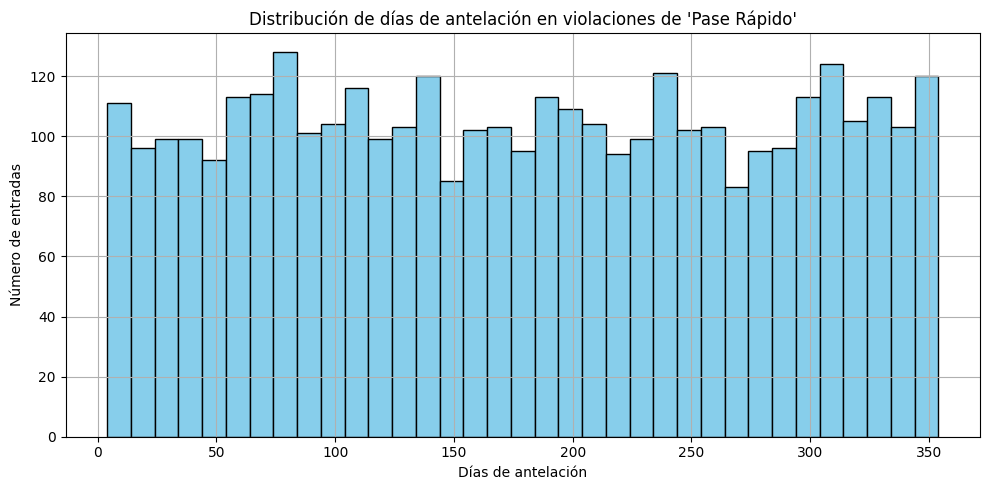

In [ ]:
#vamos a ver la distribucion en el tiempo de estas entradas que violan las reglas
# Filtrar las violaciones
violaciones_rapido = df_ticket[
    (df_ticket['tipo_entrada'] == 'Pase Rápido') &
    (df_ticket['antelacion_de_compra'] > 3)
]

# Crear histograma por días de antelación
plt.figure(figsize=(10, 5))
violaciones_rapido['antelacion_de_compra'].plot.hist(
    bins=range(4, int(violaciones_rapido['antelacion_de_compra'].max()), 10),
    edgecolor='black',
    color='skyblue'
)
plt.title("Distribución de días de antelación en violaciones de 'Pase Rápido'")
plt.xlabel("Días de antelación")
plt.ylabel("Número de entradas")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_id_visitante.groupby('tipo_entrada')['antelacion_de_compra'].describe()

count        mean         std  min  25%   50%    75%  \
tipo_entrada                                                                
Entrada Familiar    5981.0  119.854205  121.850328  0.0  0.0  88.0  228.0   
Entrada Individual  5978.0  120.225828  121.900851  0.0  0.0  87.0  228.0   
Entrada Infantil    5980.0  118.732107  121.560464  0.0  0.0  82.0  226.0   
Paquete VIP         5978.0  118.558883  120.735419  0.0  0.0  85.0  225.0   
Pase Anual          5984.0  118.896725  120.740812  0.0  0.0  87.0  222.0   
Pase Rápido         5986.0  116.481290  121.541217  0.0  0.0  78.0  222.0   

                      max  
tipo_entrada               
Entrada Familiar    364.0  
Entrada Individual  364.0  
Entrada Infantil    364.0  
Paquete VIP         364.0  
Pase Anual          364.0  
Pase Rápido         364.0

## No se pueden subir mas de 500 visitantes en una misma hora

In [ ]:
# Crear columna con la hora redondeada
df_id_visitante['hora'] = df_id_visitante['comienzo_atraccion_fecha_hora'].dt.floor('h')

#contar visitantes por atraccion y hora
conteo_por_hora = df_id_visitante.groupby(['atraccion', 'hora']).size().reset_index(name='visitantes')

#filtrar violaciones que incumplan la regla impuesta
violaciones_max500 = conteo_por_hora[conteo_por_hora['visitantes'] > 500]
violaciones_max500

Empty DataFrame
Columns: [atraccion, hora, visitantes]
Index: []

In [ ]:
#vamos a ver como es el aforo medio
media_visitantes_por_atraccion = conteo_por_hora.groupby('atraccion')['visitantes'].mean().reset_index()
media_visitantes_por_atraccion = media_visitantes_por_atraccion.sort_values(by='visitantes', ascending=False)
print(media_visitantes_por_atraccion)

                       atraccion  visitantes
1            Aventuras Acuáticas    1.892393
28              Tirolina Extrema    1.879699
14         Espejos de la Risueña    1.868726
33                  Vuelo Mágico    1.862197
0                Araña Saltarina    1.857944
34    Vuelta al Mundo en 80 Días    1.857143
19             Mansión Embrujada    1.857143
10             Circus Fantástico    1.852995
17           Jardín de las Hadas    1.852612
22       Mundo de las Maravillas    1.852399
15          Fiesta de los Dulces    1.850554
2        Barco Pirata Misterioso    1.848030
9                 Circuito Veloz    1.847744
4         Carrera de Autos Locos    1.847015
12                Cúpula Estelar    1.847015
30           Torbellino Espacial    1.843100
29         Tobogán del Arco Iris    1.840445
11            Cohetes Galácticos    1.839623
24             Rápido del Trueno    1.832423
27         Simulador Espacial 3D    1.832392
16              Gran Caída Libre    1.828947
20       M

In [ ]:
#queremos ver el promedio diario por atraccion, a ver si se acerca al limite impuesto por el negocio

# Contar visitantes por atracción y día
visitantes_por_dia = df_id_visitante.groupby(['atraccion', 'fecha']).size().reset_index(name='visitantes')

# Calcular el promedio diario por atracción
promedio_diario = visitantes_por_dia.groupby('atraccion')['visitantes'].mean().reset_index()
promedio_diario = promedio_diario.sort_values(by='visitantes', ascending=False)

# Mostrar las 10 atracciones con mayor promedio diario
print(promedio_diario.head(10))

                     atraccion  visitantes
34  Vuelta al Mundo en 80 Días   33.548387
10           Circus Fantástico   32.935484
1          Aventuras Acuáticas   32.903226
20     Montaña Rusa de la Luna   32.741935
19           Mansión Embrujada   32.709677
23         Rueda de la Fortuna   32.612903
5   Carros Chocones Divertidos   32.516129
24           Rápido del Trueno   32.451613
22     Mundo de las Maravillas   32.387097
15        Fiesta de los Dulces   32.354839


In [ ]:

#Agrupar por atracción y contar cuántos visitantes totales tiene cada una y ordenad de mayor a menor
demanda_total = df_id_visitante.groupby('atraccion').size().reset_index(name='total_visitantes')
demanda_total = demanda_total.sort_values(by='total_visitantes', ascending=False)
demanda_total.head(10)

atraccion  total_visitantes
34  Vuelta al Mundo en 80 Días              1041
10           Circus Fantástico              1027
1          Aventuras Acuáticas              1021
19           Mansión Embrujada              1017
20     Montaña Rusa de la Luna              1016
23         Rueda de la Fortuna              1014
5   Carros Chocones Divertidos              1010
15        Fiesta de los Dulces              1008
24           Rápido del Trueno              1008
22     Mundo de las Maravillas              1007